In [44]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris as ir

from collections import Counter

import seaborn as sns 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [45]:
Counter([9,9,9,9,7,7,7,3,3,2])

Counter({9: 4, 7: 3, 3: 2, 2: 1})

In [46]:
# Критерий энтропии

def HEntropy(l):
  length = len(l)
  cnt = Counter(l)

  ent = 0
  for cl in cnt.values():
    p = cl / length
    l2 = np.log2(p)
    it = -p * l2
    ent += it

  return ent

In [47]:
# Критерий Джини

def HGini(l):
  length = len(l)
  cnt = Counter(l)

  gini = 0
  for cl in cnt.values():
    p_1 = cl / length
    p_2 = (1 - p_1)
    it = p_1 * p_2
    gini += it

  return gini

In [48]:
# Функция для вычисления функционала качества

def IG(H, l, i):
  left_l = l[:i]
  right_l = l[i:]
  return H(l) - (len(left_l) / len (l)) * H(left_l) - (len(right_l) / len(l) * H(right_l))

In [49]:
# Функция для визуализации работы произвольного критерия качества на выборке

def test_H(H, l):
  print(' {:4}{:3}     {:4}    {:4}    {:4}'.format('#', 'l', 'IG', 'Hl', 'Hr'))
  print('-' * 35)
  i_max, IG_max = 0, 0

  for i in range(1, len(l)):
    print(f'{i : 2} {l[i]:3}     {IG(H, l, i): .2f}   {H(l[:i]): .2f}   {H(l[i:]): .2f}')

    if IG_max < IG(H, l, i):
      i_max, IG_max = i, IG(H, l, i)

  print(f'Деление после элемента: {i_max - 1}')

In [50]:
l = [1] * 5 + [2] * 3
l

[1, 1, 1, 1, 1, 2, 2, 2]

In [51]:
test_H(HEntropy, l)

 #   l       IG      Hl      Hr  
-----------------------------------
 1   1      0.09    0.00    0.99
 2   1      0.20    0.00    1.00
 3   1      0.35    0.00    0.97
 4   1      0.55    0.00    0.81
 5   2      0.95    0.00    0.00
 6   2      0.47    0.65    0.00
 7   2      0.20    0.86    0.00
Деление после элемента: 4


In [52]:
test_H(HGini, l)

 #   l       IG      Hl      Hr  
-----------------------------------
 1   1      0.04    0.00    0.49
 2   1      0.09    0.00    0.50
 3   1      0.17    0.00    0.48
 4   1      0.28    0.00    0.38
 5   2      0.47    0.00    0.00
 6   2      0.26    0.28    0.00
 7   2      0.11    0.41    0.00
Деление после элемента: 4


In [53]:
iris = ir()

X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.DataFrame(iris.target, columns = ['species'])
df = pd.concat([X, y], axis=1)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
df.shape

(150, 5)

In [55]:
Xcut = X[X.columns[2:4]]
Xcut.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [56]:
clf = DecisionTreeClassifier(random_state=1)

In [57]:
clf.fit(Xcut, y)

DecisionTreeClassifier(random_state=1)

In [58]:
predictions = clf.predict(Xcut)
pred_proba = clf.predict_proba(Xcut)[:10]

In [59]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
pred_proba

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [61]:
clf.score(Xcut, y)

0.9933333333333333

Визуализация границ принятия решений

In [62]:
def get_grid(data):
  x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
  y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
  return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [66]:
def test_clf(clf, X, y, cy=0, fit_clf=False):
  xx, yy = get_grid(X.values)

  if fit_clf:
    clf.fit(X, y)

  predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  plt.figure(figsize = (8,8))
  plt.pcolormesh(xx, yy, predicted, cmap='Pastel1')
  plt.scatter(X.values[:, 0], X.values[:, 1], s=50, cmap='tab10', c=cy)
  plt.xlabel(X.columns[0])
  plt.ylabel(X.columns[1])

  if fit_clf:
    return clf



In [64]:
dt = DecisionTreeClassifier(min_samples_leaf=2, random_state=10)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


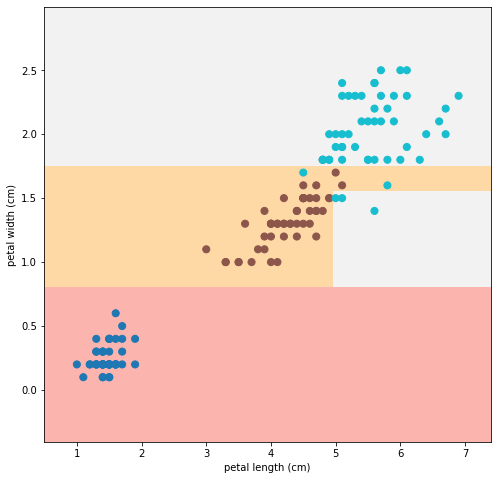

In [67]:
clf1 = test_clf(dt, Xcut, y, cy=y['species'].tolist(), fit_clf=True)

Визуализация дерева решений модели DecisionTreeClassifier:

In [68]:
from sklearn.tree import plot_tree

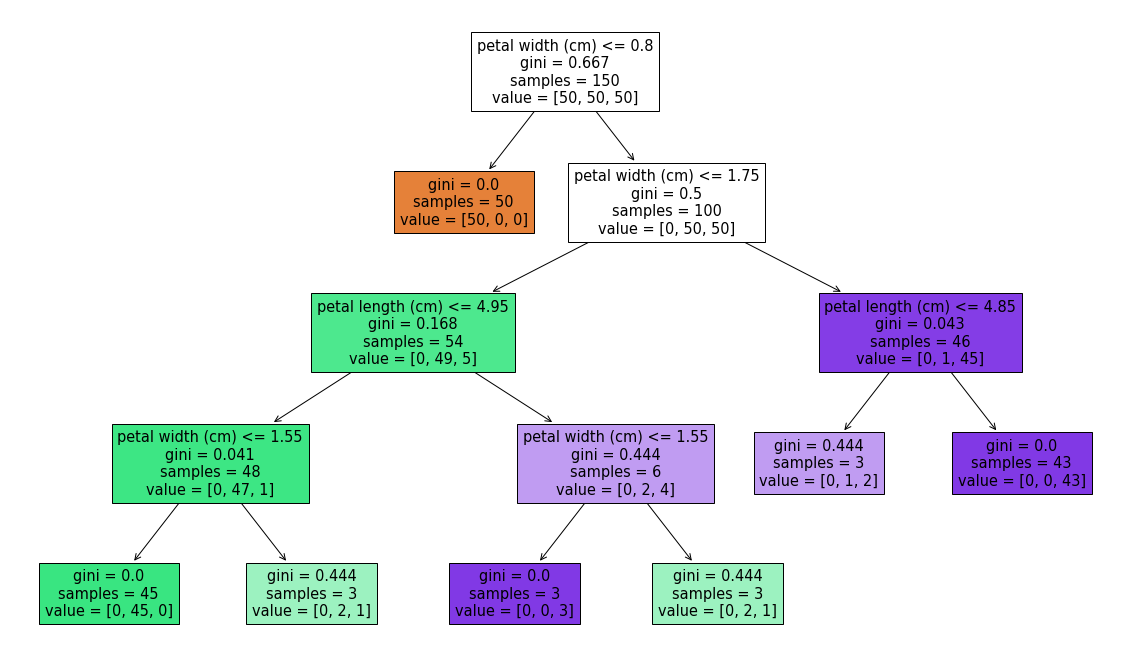

In [70]:
plt.figure(figsize=(20,12))
plot_tree(dt, feature_names=Xcut.columns, filled=True)
plt.show()

Оценка важности признаков

In [71]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.DataFrame(iris.target, columns = ['species'])

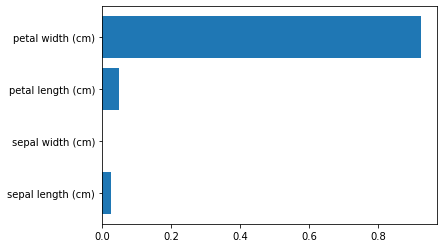

In [73]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.show()

DecisionTreeRegressor

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
np.random.seed(1)

In [76]:
X = np.sort(5 * np.random.rand(80,1), axis=0)
y = np.sin(X).ravel()

In [77]:
y[::5] += 3 * (0.5 - np.random.rand(16))

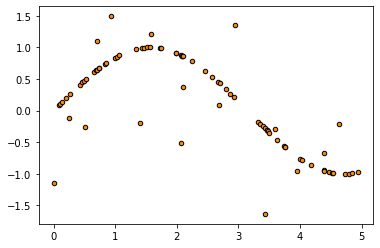

In [78]:
plt.scatter(X, y, s=20, edgecolor='black', c='darkorange', label='data')

Fit regression model

In [89]:
list_depth = [1,2,3,4,5,6]

dt_regs = {}

for i in list_depth:
  dt_regs[f'depth={i}'] = DecisionTreeRegressor(max_depth=i, random_state=10).fit(X, y)

dt_regs['depth=inf'] =  DecisionTreeRegressor(random_state=10).fit(X,y)
dt_regs['reg'] = DecisionTreeRegressor(min_samples_leaf=3, random_state=10).fit(X,y)

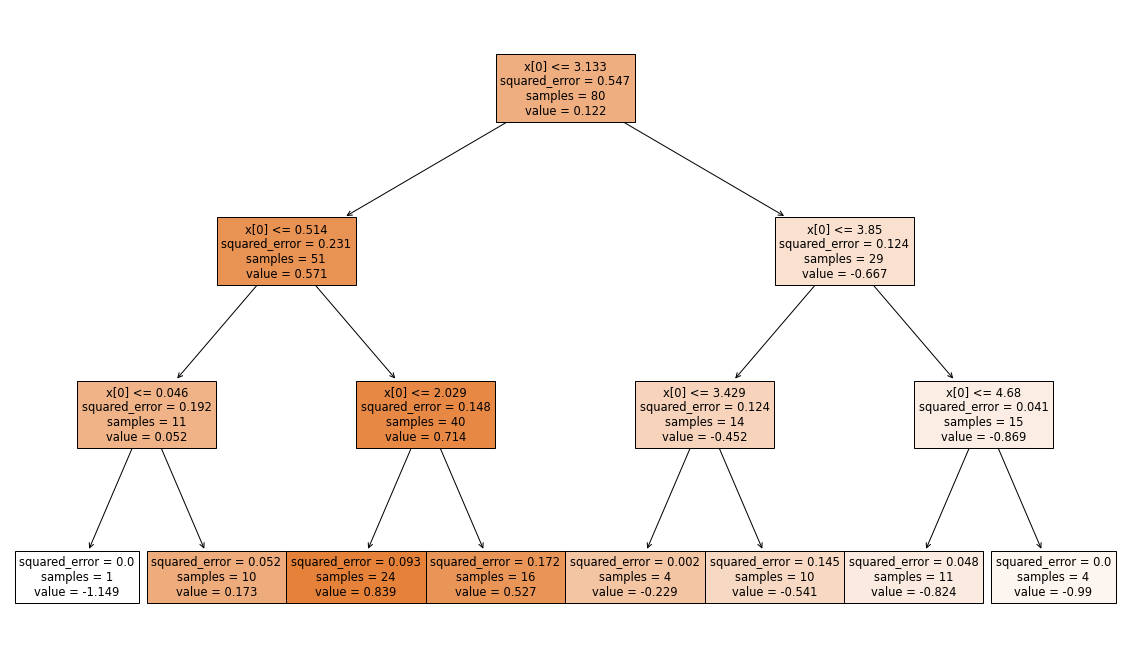

In [90]:
plt.figure(figsize=(20,12))
plot_tree(dt_regs['depth=3'], filled=True)
plt.show()

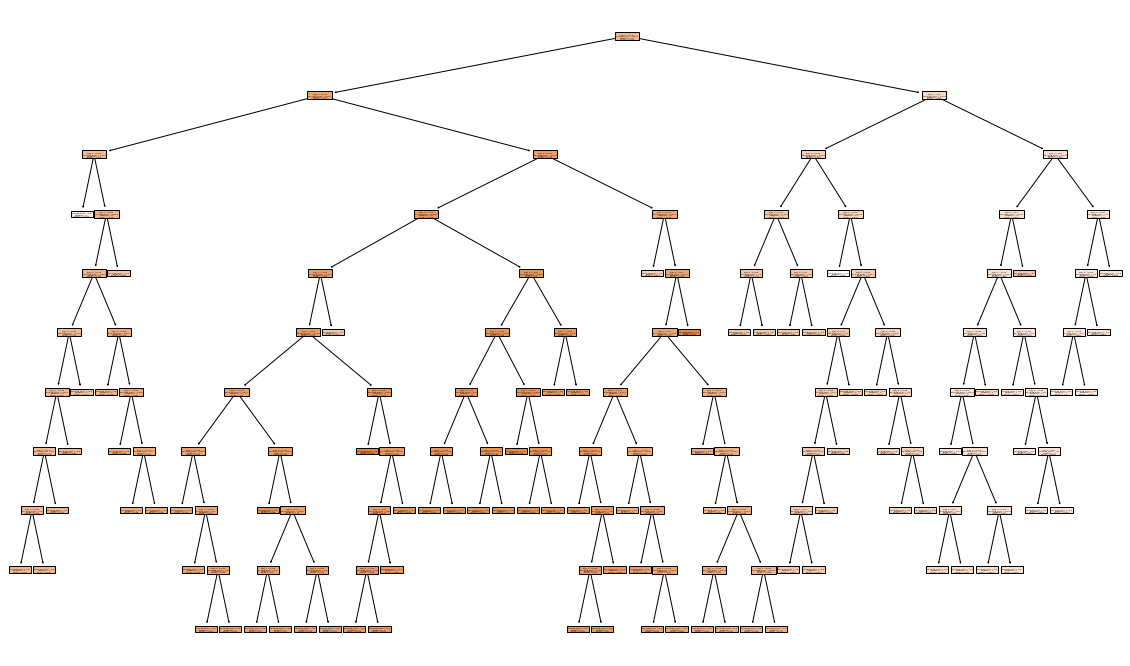

In [91]:
plt.figure(figsize=(20,12))
plot_tree(dt_regs['depth=inf'], filled=True)
plt.show()

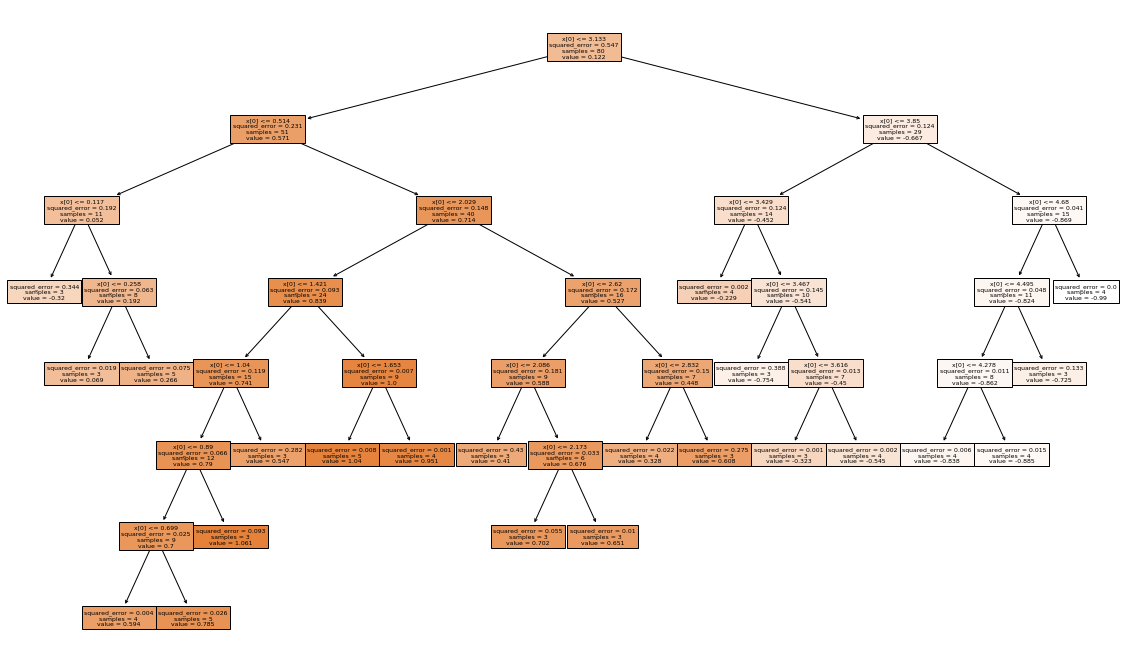

In [92]:
plt.figure(figsize=(20,12))
plot_tree(dt_regs['reg'], filled=True)
plt.show()

In [93]:
# Predict

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

pred_list = {}
for key, cur_dt_reg in dt_regs.items():
  pred_list[key] = cur_dt_reg.predict(X_test)
  print(key, cur_dt_reg.score(X,y), cur_dt_reg.score(X_test, np.sin(X_test)))

depth=1 0.6480126819897154 0.8050909834218882
depth=2 0.7629899797432984 0.8920311407846988
depth=3 0.8288157322356544 0.9151162493007627
depth=4 0.908848114225015 0.8434425919992057
depth=5 0.9538725108408801 0.7138725846509844
depth=6 0.9778226686694176 0.7245186930767236
depth=inf 1.0 0.7090258512522323
reg 0.8436631667237297 0.9167741882150025


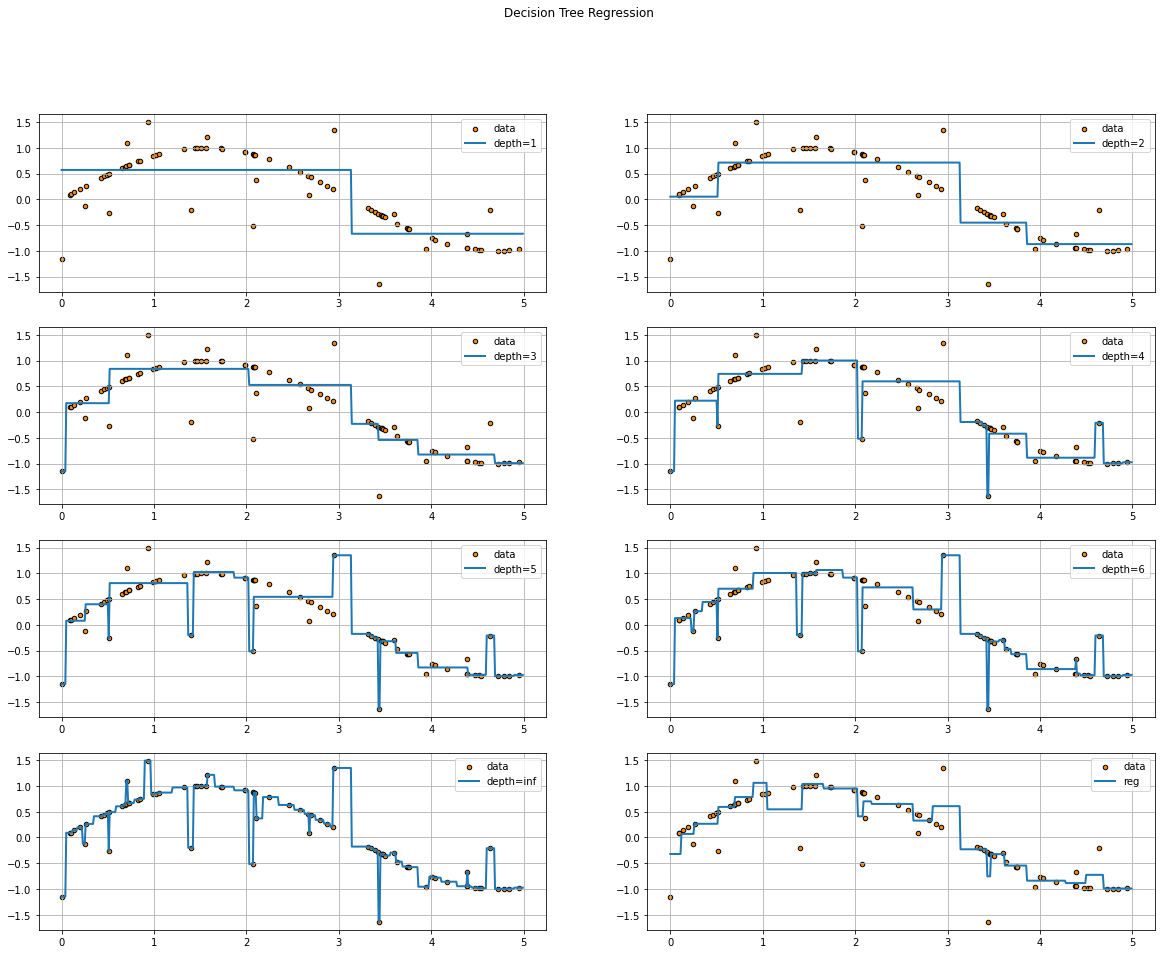

In [94]:
# Plot the results

fig, axa = plt.subplots(4,2, figsize=(20,15))

for i, (key, cur_pred) in enumerate(pred_list.items()):
  ax = axa[i//2, i%2]
  ax.scatter(X,y, s=20, edgecolor='black', c='darkorange', label='data')
  ax.plot(X_test, cur_pred, label=f'{key}', linewidth=2)
  ax.grid()
  ax.legend()

fig.suptitle("Decision Tree Regression")
plt.show()